# **👕 Project: Fashion Image Classification with CNNs**
**Author: meytiii**

Description:

This project explores Computer Vision using TensorFlow. We will train a Convolutional Neural Network (CNN) to classify grayscale images of clothing into 10 distinct categories.

This is a foundational project for understanding how machines "see" and interpret visual data.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


# **1. Load & Visualize Data**
We load the Fashion MNIST dataset, which contains 70,000 images (28x28 pixels).

Since the data comes with numeric labels (0-9), we map them to human-readable names like "T-shirt" or "Ankle boot". We also normalize the pixel values to be between 0 and 1 (instead of 0 to 255) to help the neural network learn faster.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


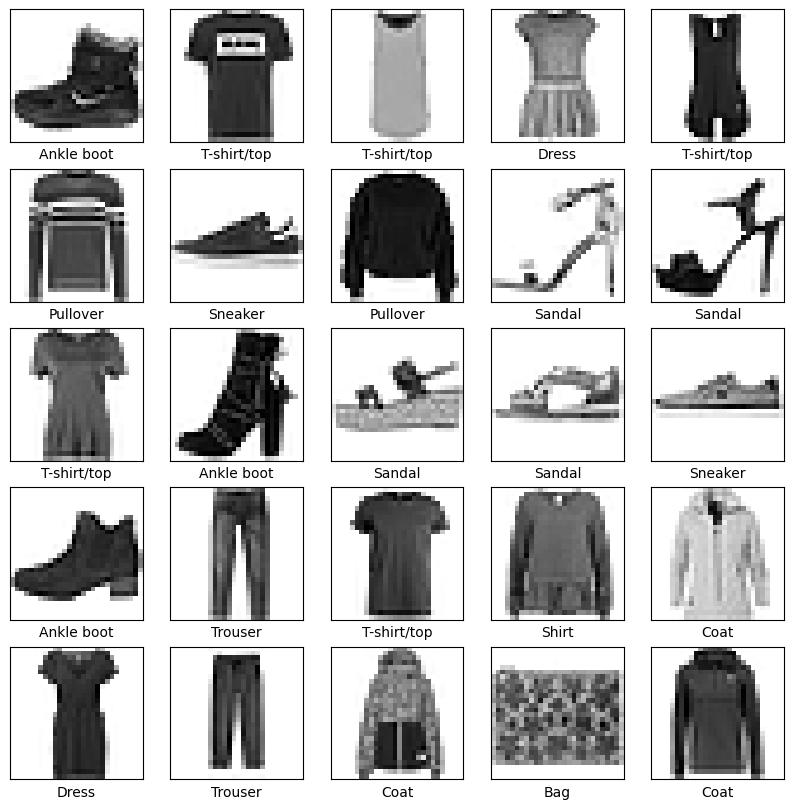

In [2]:
# 1. Load Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 2. Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. Normalize pixel values (0-255 -> 0.0-1.0)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 4. Visualize a few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **2. Building the Convolutional Neural Network (CNN)**
We build a model specifically designed for images:

Conv2D: Scans the image to detect features (edges, textures, shapes).

MaxPooling2D: Reduces the size of the image to focus on the most important features.

Flatten: Converts the 2D image matrix into a flat list of numbers.

Dense: The final classification layer.

In [3]:
model = tf.keras.Sequential([
    # Convolutional Block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Classification Block
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) # 10 Output classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# **3. Training the Model**
We train the model for 10 epochs. You should see the accuracy rise quickly as the CNN learns to distinguish between a "Sandal" and a "Sneaker".

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7827 - loss: 0.6172 - val_accuracy: 0.8744 - val_loss: 0.3506
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3102 - val_accuracy: 0.8889 - val_loss: 0.3055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9060 - loss: 0.2579 - val_accuracy: 0.9020 - val_loss: 0.2727
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9178 - loss: 0.2200 - val_accuracy: 0.9033 - val_loss: 0.2605
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9291 - loss: 0.1909 - val_accuracy: 0.9085 - val_loss: 0.2532
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9377 - loss: 0.1662 - val_accuracy: 0.9138 - val_loss: 0.2471
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9431 - loss: 0.1502 - val_accuracy: 0.9144 - val_loss: 0.2569
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9494 - loss: 0.1306 -

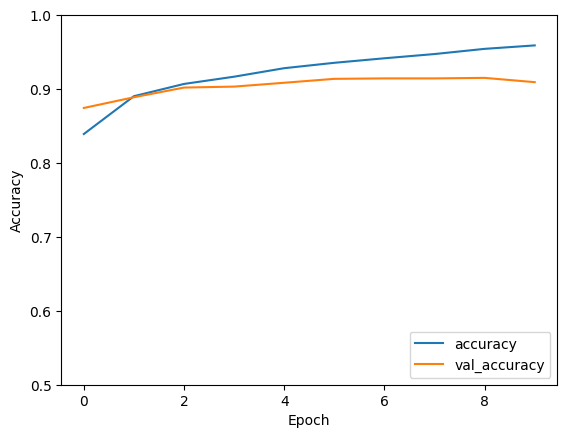

In [4]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# **4. 🔮 Visual Predictions**
Let's test the model!

The code below picks a random image from the test set, displays it, and prints what the model thinks it is (along with a bar chart of its confidence). Run this cell multiple times to see different items!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


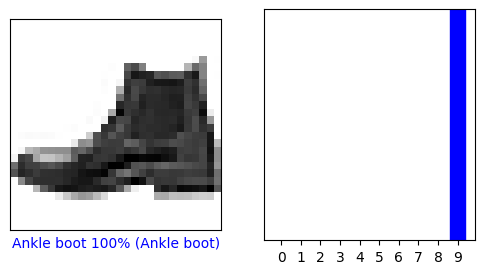

In [8]:
# Helper functions for plotting
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# --- RUN PREDICTION ON RANDOM IMAGE ---
import random

# Pick a random index
i = random.randint(0, len(test_images))

# Make prediction
# Add batch dimension (1, 28, 28)
img = np.expand_dims(test_images[i], 0)
prediction_logits = model.predict(img)
prediction_probs = tf.nn.softmax(prediction_logits).numpy()[0]

# Plot results
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction_probs, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction_probs, test_labels)
plt.show()